In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from pathlib import Path
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

In [9]:

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [12]:

def read_analysis_files(analysis_path: str) -> dict:
    """
    讀取並分析交易結果檔案
    
    Parameters:
    analysis_path (str): 分析檔案所在的目錄路徑
    
    Returns:
    dict: 包含各個分析數據框的字典
    """
    # 將字串路徑轉換為Path物件
    path = Path(analysis_path)
    
    # 讀取所有CSV檔案
    analysis_data = {}
    
    try:
        # 讀取交易頻率分析
        freq_path = path / 'trading_frequency.csv'
        if freq_path.exists():
            trading_frequency = pd.read_csv(freq_path, index_col=0)
            analysis_data['trading_frequency'] = trading_frequency
            print("\n交易頻率分析摘要:")
            print(trading_frequency.describe())
        
        # 讀取價差分析
        spread_path = path / 'spread_analysis.csv'
        if spread_path.exists():
            spread_analysis = pd.read_csv(spread_path, index_col=0)
            analysis_data['spread_analysis'] = spread_analysis
            print("\n價差分析摘要:")
            print(spread_analysis.describe())
        
        # 讀取交易特徵分析
        char_path = path / 'trade_characteristics.csv'
        if char_path.exists():
            trade_characteristics = pd.read_csv(char_path, index_col=0)
            analysis_data['trade_characteristics'] = trade_characteristics
            print("\n交易特徵分析摘要:")
            print(trade_characteristics.describe())
            
        # 產生一些基本視覺化
        generate_analysis_plots(analysis_data, path)
        
        return analysis_data
    
    except Exception as e:
        print(f"讀取檔案時發生錯誤: {str(e)}")
        return None

def generate_analysis_plots(analysis_data: dict, output_path: Path):
    """
    為分析數據生成視覺化圖表
    
    Parameters:
    analysis_data (dict): 包含分析數據的字典
    output_path (Path): 輸出圖表的路徑
    """
    plt.style.use('classic')
    
    # 創建plots目錄
    plots_dir = output_path / 'plots'
    plots_dir.mkdir(exist_ok=True)
    
    # 交易頻率分布圖
    if 'trading_frequency' in analysis_data:
        plt.figure(figsize=(12, 6))
        sns.histplot(data=analysis_data['trading_frequency']['trades_per_month'], 
                    bins=30, kde=True)
        plt.title('每月交易次數分布')
        plt.xlabel('每月交易次數')
        plt.ylabel('頻率')
        plt.savefig(plots_dir / 'trading_frequency_dist.png')
        plt.close()
    
    # 價差分析箱型圖
    if 'spread_analysis' in analysis_data:
        plt.figure(figsize=(12, 6))
        spread_analysis = analysis_data['spread_analysis']
        spread_analysis.boxplot(column=['spread_mean', 'spread_std', 'zscore_mean', 'zscore_std'])
        plt.title('價差統計分布')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(plots_dir / 'spread_analysis_boxplot.png')
        plt.close()
    
    # 交易特徵相關性熱圖
    if 'trade_characteristics' in analysis_data:
        plt.figure(figsize=(10, 8))
        sns.heatmap(analysis_data['trade_characteristics'].corr(), 
                   annot=True, cmap='coolwarm', center=0)
        plt.title('交易特徵相關性矩陣')
        plt.tight_layout()
        plt.savefig(plots_dir / 'trade_characteristics_correlation.png')
        plt.close()

# 使用範例
if __name__ == "__main__":
    analysis_path = "/Users/mouyasushi/Desktop/pair_trading/output/analysis_20241110_135017/analysis"
    analysis_results = read_analysis_files(analysis_path)
    



交易頻率分析摘要:
       avg_days_between_trades  trades_per_month
count             4.029000e+03      4.029000e+03
mean              1.519751e+00      1.974008e+01
std               4.485858e-14      1.229392e-12
min               1.519751e+00      1.974008e+01
25%               1.519751e+00      1.974008e+01
50%               1.519751e+00      1.974008e+01
75%               1.519751e+00      1.974008e+01
max               1.519751e+00      1.974008e+01

價差分析摘要:
       spread_mean   spread_std  zscore_mean   zscore_std
count  4029.000000  4029.000000  4029.000000  4029.000000
mean     33.358661    19.819887     0.052440     1.386831
std     378.218084    33.552328     0.162914     0.096318
min   -4473.989700     0.219406    -0.786841     1.065820
25%     -13.788380     3.646039    -0.054756     1.320910
50%      26.010387     8.465630     0.050723     1.381155
75%      76.418230    22.174355     0.160459     1.449310
max    4889.355500   406.306671     0.738829     1.811914

交易特徵分析摘要:
      

### freq ( 有誤 )

In [25]:
# 查看交易頻率數據  --> 目前的所有值都一樣
analysis_results['trading_frequency'].head(10)

,avg_days_between_trades,trades_per_month
0,1.519751,19.740082
1,1.519751,19.740082
2,1.519751,19.740082
3,1.519751,19.740082
4,1.519751,19.740082
5,1.519751,19.740082
6,1.519751,19.740082
7,1.519751,19.740082
8,1.519751,19.740082
9,1.519751,19.740082


### spread

In [26]:
# 查看價差分析數據
analysis_results['spread_analysis'].head(10)

,pair,spread_mean,spread_std,zscore_mean,zscore_std
0,9937-2645,22.509075,3.466979,0.117173,1.377241
1,9937-1210,5.176336,2.884358,0.134573,1.391972
2,9937-2247,24.082424,2.530782,0.218905,1.372102
3,9937-5289,33.578280,2.946832,0.192768,1.300480
4,9937-6579,44.648350,3.506264,0.244467,1.506771
5,9937-2455,45.562237,3.378457,0.112396,1.387381
6,9937-2441,1.834807,3.052088,0.039581,1.335182
7,9937-6803,-1.862236,2.783909,0.268301,1.426957
8,9937-5388,35.383907,3.352856,0.207934,1.358717
9,9937-2634,34.160625,3.318805,0.368839,1.328581


### Ratios 
- win_profit : win rate * avg win 
- loss_risK : loss rate * avg loss 
- risk_reward : win profit / loss risk 

In [38]:
analysis_results

{'trading_frequency':       avg_days_between_trades  trades_per_month
 0                    1.519751         19.740082
 1                    1.519751         19.740082
 2                    1.519751         19.740082
 3                    1.519751         19.740082
 4                    1.519751         19.740082
 ...                       ...               ...
 4024                 1.519751         19.740082
 4025                 1.519751         19.740082
 4026                 1.519751         19.740082
 4027                 1.519751         19.740082
 4028                 1.519751         19.740082
 
 [4029 rows x 2 columns],
 'spread_analysis':             pair  spread_mean  spread_std  zscore_mean  zscore_std
 0      9937-2645    22.509075    3.466979     0.117173    1.377241
 1      9937-1210     5.176336    2.884358     0.134573    1.391972
 2      9937-2247    24.082424    2.530782     0.218905    1.372102
 3      9937-5289    33.578280    2.946832     0.192768    1.300480
 4  

In [39]:
# 首先取得我們要找的配對列表
target_pairs = [
    '3406-2367', '2524-4583', '2201-5536', '4128-6919', '2330-2367',
    '6533-3583', '2330-6469', '2382-4128', '6469-9917', '6196-1434'
]

# 從 spread_analysis 找到這些配對的索引
spread_df = analysis_results['spread_analysis']
pair_indices = []

for target_pair in target_pairs:
    # 找到對應的索引
    index = spread_df[spread_df['pair'] == target_pair].index
    if len(index) > 0:
        pair_indices.append(index[0])

# 使用這些索引來查找 trade_characteristics 中的 risk_reward_ratio
trade_chars = analysis_results['trade_characteristics']
target_ratios = trade_chars.loc[pair_indices, 'risk_reward_ratio']

# 將索引與配對名稱對應起來顯示結果
print("Risk-Reward Ratios for Target Pairs:")
print("====================================")
for idx, ratio in target_ratios.items():
    pair = spread_df.loc[idx, 'pair']
    print(f"{pair}: {ratio:.4f}")

# 找出最大值
max_ratio = target_ratios.max()
max_idx = target_ratios.idxmax()
max_pair = spread_df.loc[max_idx, 'pair']
print("\nHighest Risk-Reward Ratio:")
print(f"Pair: {max_pair}")
print(f"Ratio: {max_ratio:.4f}")

# 也可以一次性顯示所有相關資訊
print("\nComplete Information:")
print("=====================")
for idx, ratio in target_ratios.items():
    pair = spread_df.loc[idx, 'pair']
    win_profit = trade_chars.loc[idx, 'win_profit_ratio']
    loss_risk = trade_chars.loc[idx, 'loss_risk_ratio']
    print(f"Pair: {pair}")
    print(f"Risk-Reward Ratio: {ratio:.4f}")
    print(f"Win Profit Ratio: {win_profit:.6f}")
    print(f"Loss Risk Ratio: {loss_risk:.6f}")
    print("---------------------")

Risk-Reward Ratios for Target Pairs:
3406-2367: 0.0340
2524-4583: 0.0286
4128-6919: 0.0600
2382-4128: 0.0476

Highest Risk-Reward Ratio:
Pair: 4128-6919
Ratio: 0.0600

Complete Information:
Pair: 3406-2367
Risk-Reward Ratio: 0.0340
Win Profit Ratio: 0.000264
Loss Risk Ratio: 0.007767
---------------------
Pair: 2524-4583
Risk-Reward Ratio: 0.0286
Win Profit Ratio: 0.000143
Loss Risk Ratio: 0.004989
---------------------
Pair: 4128-6919
Risk-Reward Ratio: 0.0600
Win Profit Ratio: 0.000209
Loss Risk Ratio: 0.003481
---------------------
Pair: 2382-4128
Risk-Reward Ratio: 0.0476
Win Profit Ratio: 0.000188
Loss Risk Ratio: 0.003953
---------------------


### 細看交易對表現
- total_trades 跟 number of trades 的區別是什麼？

In [55]:
anal_path = "/Users/mouyasushi/Desktop/pair_trading/output/analysis_20241110_135017/results_20241110_140530/all_pairs_results.csv"
path = Path(anal_path)
all_results = pd.read_csv(path, index_col= 0)
all_results.columns

Index(['start_date', 'end_date', 'total_return', 'annual_return',
       'annual_volatility', 'sharpe_ratio', 'win_rate', 'total_trades',
       'winning_trades', 'losing_trades', 'total_pnl', 'average_daily_pnl',
       'average_win', 'average_loss', 'profit_factor', 'max_drawdown',
       'longest_win_streak', 'longest_lose_streak', 'number_of_trades',
       'avg_trade_duration', 'hedge_ratio', 'spread_stdev', 'correlation',
       'calmar_ratio'],
      dtype='object')

In [56]:
all_results[all_results['sharpe_ratio'] == 1.8746334759530996]

,start_date,end_date,total_return,annual_return,annual_volatility,sharpe_ratio,win_rate,total_trades,winning_trades,losing_trades,...,profit_factor,max_drawdown,longest_win_streak,longest_lose_streak,number_of_trades,avg_trade_duration,hedge_ratio,spread_stdev,correlation,calmar_ratio
pair,,,,,,,,,,,,,,,,,,,,,
6533-5871,2022-10-14,2024-10-14,0.150675,0.076301,0.039643,1.874633,0.027027,481,13,468,...,5.639097,-0.021645,1,93,30,16.066667,1.869743,37.230602,0.803528,3.52502


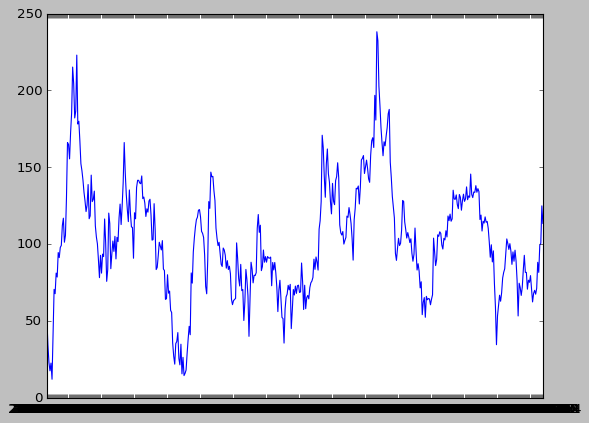

In [64]:
first_pair = "/Users/mouyasushi/Desktop/pair_trading/output/analysis_20241110_135017/results_20241110_140530/detailed_analysis/6533-5871/positions.csv"
path = Path(first_pair)
p6653_5871 = pd.read_csv(path, index_col= 0)
spread = p6653_5871['spread']


plt.plot(spread)